# Logistic回归

根据现有数据对分类边界线建立回归公式，以此进行分类。要找到最佳拟合参数集。

### 梯度上升法
要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。

In [24]:
import numpy as np
#加载数据集
def loadDataSet():
    dataMat=[]
    labelMat=[]
    fr=open('testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

#sigmoid函数
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

#logistic回归梯度上升优化算法
def gradAscent(dataMatIn,classLabels):
    dataMatrix=np.mat(dataMatIn)   #转换成矩阵形式
    labelMat=np.mat(classLabels).transpose()    
    m,n=np.shape(dataMatrix)
    alpha=0.001
    maxCycles=500   #迭代次数
    weights=np.ones((n,1))  #3个权重，都初始化为1
    for k in range(maxCycles):
        h=sigmoid(dataMatrix*weights)
        error=(labelMat-h)
        weights=weights+alpha*dataMatrix.transpose()*error  #权重更新公式：3*100 * 100*1 = 3*1
    return weights

In [17]:
dataArr,labelMat=loadDataSet()
gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [21]:
#画出数据集和logistic回归最佳拟合直线的函数
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    %matplotlib inline
    dataMat,labelMat=loadDataSet()
    dataArr=np.array(dataMat)
    n=np.shape(dataArr)[0]
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[]
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x=np.arange(-3.0,3.0,0.1)  #创建数组，（起始点，终止点，步长）
    y=(-weights[0]-weights[1]*x)/weights[2]  #y即x2
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
        

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


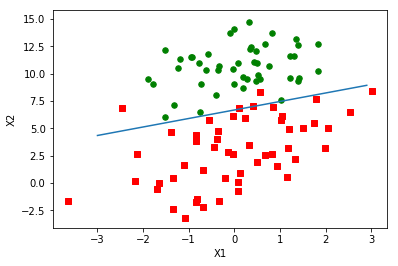

In [22]:
weights=gradAscent(dataArr,labelMat)
print(weights)
plotBestFit(weights.getA())

### 随机梯度上升算法 


In [33]:
def stoGradAscent0(dataMatrix,classLabels):
    m,n=np.shape(dataMatrix)
    alpha=0.01
    weights=np.ones(n)
    for i in range(m): #迭代了100次
        h=sigmoid(sum(dataMatrix[i]*weights))
        error=classLabels[i]-h
        weights=weights+alpha*error*dataMatrix[i]  #error是一个数和dataMatrix[i]是一个1*3的矩阵
    return weights

[[ 1.       -0.017612 14.053064]
 [ 1.       -1.395634  4.662541]
 [ 1.       -0.752157  6.53862 ]
 [ 1.       -1.322371  7.152853]
 [ 1.        0.423363 11.054677]]
[0, 1, 0, 0, 0]


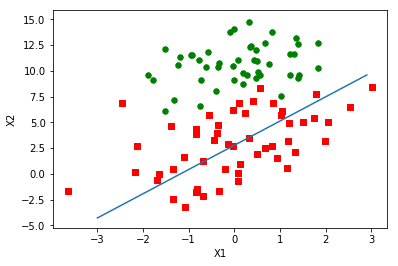

In [34]:
print(np.mat(dataArr[:5]))
print(labelMat[:5])
weights=stoGradAscent0(np.array(dataArr),labelMat)
plotBestFit(weights)

图中得到的结果显示随机梯度效果不好，但随机梯度下降迭代了100次，而之前的梯度下降算法迭代了500次。  
一个判断优化算法优劣的可靠方法是看它是否收敛，也就是参数是否达到了稳定值，是否还会不断变化。

### 改进的随机梯度上升算法

In [42]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n=np.shape(dataMatrix)
    weights=np.ones(n)
    for j in range(numIter):
        for i in range(m):
            dataIndex=list(range(m))
            alpha=4/(1.0+j+i)+0.01  #alpha每次迭代时需要调整
            randIndex=int(np.random.uniform(0,len(dataIndex)))  #产生随机数
            h=sigmoid(sum(dataMatrix[randIndex]*weights))   #通过随机选取样本来更新回归系数，用完之后再从随机数列表中删掉该值--减少周期性的波动
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights


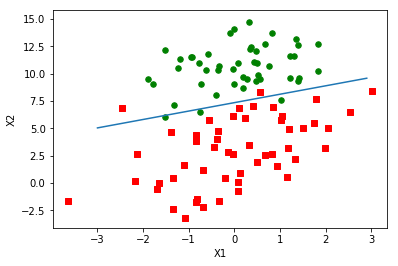

In [44]:
weights=stocGradAscent1(np.array(dataArr),labelMat)
plotBestFit(weights)

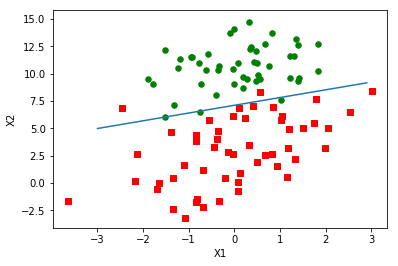

In [45]:
weights=stocGradAscent1(np.array(dataArr),labelMat,500)
plotBestFit(weights)

### 示例1：从疝气病症预测病马的死亡率

（1）收集数据：给定数据文件  
（2）准备数据：用python解析文本文件并填充缺失值  
（3）分析数据：可视化并观察数据  
（4）训练算法：使用优化算法，找到最佳的系数  
（5）测试算法：为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，通过改变迭代的次数和步长等参数来得到更好的回归系数  
（6）使用算法

#### （1）准备数据：处理数据中的缺失值
a.使用可用特征的均值来填补缺失值  
b.使用特殊值来填补缺失值，如-1  
c.忽略有缺失值的样本  
d.使用相似样本的均值添补缺失值  
e.使用另外的机器学习算法预测缺失值  
   
数据预处理：  
   &nbsp; &nbsp;a.所有的缺失值必须用一个实数值来替换，因为使用的NumPy数据类型不允许包含缺失值。  
   &nbsp; &nbsp;这里选择实数0来替换所有的缺失值，恰好能适用于logistic回归，在更新时不会影响系数的值。  
   &nbsp; &nbsp;b.因为sigmoid(0)=0.5,对结果的预测不具有任何倾向性，因此不会对误差项造成任何影响。  
   &nbsp; &nbsp;c.该数据集中特征取值一般不为0，因此在某种意义上也满足“特殊值”这个要求。  
       
  &nbsp;&nbsp;&nbsp;&nbsp; 如果测试数据集中发现了一条数据的类别标签已经缺失，简单做法就是将该条数据丢弃。（因为类别标签与特征不同，很难确定采用某个合适的值来替换），这种方法对logistic回归进行分类是合理的，采用类似KNN的方法就不太可行。
    

In [58]:
#测试算法
#logistic回归进行分类：把测试集上的每个特征向量乘以最优化方法得来的回归系数，再将该乘积结果求和，最后输入到sigmoid函数中即可
def classifyVector(inX,weights):
    prob=sigmoid(sum(inX*weights))
    if prob>0.5:
        return 1.0
    else:
        return 0.0

def colicTest():
    frTrain=open('horseColicTraining.txt')
    frTest=open('horseColicTest.txt')
    trainingSet=[]
    trainingLabels=[]
    for line in frTrain.readlines():
        currLine=line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights=stocGradAscent1(np.array(trainingSet),trainingLabels,500)
    errorCount=0
    numTestVec=0.0
    for line in frTest.readlines():
        numTestVec+=1.0
        currLine=line.strip().split('\t')
        lineArr=[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr),trainWeights))!=int(currLine[21]):
            errorCount+=1
    errorRate=(float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests=10
    errorSum=0.0
    for k in range(numTests):
        errorSum+=colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests,errorSum/float(numTests)))
        

In [59]:
multiTest()

the error rate of this test is: 0.313433
the error rate of this test is: 0.298507
the error rate of this test is: 0.283582
the error rate of this test is: 0.671642
the error rate of this test is: 0.283582
the error rate of this test is: 0.358209
the error rate of this test is: 0.298507
the error rate of this test is: 0.537313
the error rate of this test is: 0.268657
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.359701


In [61]:
frTrain=open('horseColicTraining.txt')
frTest=open('horseColicTest.txt')
trainingSet=[];testSet=[]
trainingLabels=[];testLabels=[]
for line in frTrain.readlines():
    currLine=line.strip().split('\t')
    lineArr=[]
    for i in range(21):
        lineArr.append(float(currLine[i]))
    trainingSet.append(lineArr)
    trainingLabels.append(float(currLine[21]))
for line in frTest.readlines():
    currLine=line.strip().split('\t')
    lineArr=[]
    for i in range(21):
        lineArr.append(float(currLine[i]))
    testSet.append(lineArr)
    testLabels.append(float(currLine[21]))

In [62]:
print(np.array(trainingSet).shape)
print(np.array(testSet).shape)

(299, 21)
(67, 21)
